<a href="https://colab.research.google.com/github/CooperFinn/Python-Tutorial/blob/master/Data%20Visualization%20with%20Python/3.Pie%20Charts%2CBox%20Plots%2CScatter%20Plots%2C%20and%20Bubble%20Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>Pie Charts, Box Plots, Scatter Plots, and Bubble Plots</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Downloading and Prepping Data](#2)<br>
2. [Pie Charts](#6) <br>
3. [Box Plots](#8) <br>
4. [Scatter Plots](#10) <br>
5. [Bubble Plots](#12) <br> 
</div>
<hr>

##1.Downloading and Prepping Data

Toolkits:  [Pandas](http://pandas.pydata.org/) and [Numpy](http://www.numpy.org/) for data wrangling, analysis, and visualization; [Matplotlib](http://matplotlib.org/) for plotting.

Dataset: [Immigration to Canada from 1980 to 2013](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx)


In [113]:
# import primary modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# check for latest version of pandas,numpy and matplotlib
print(pd.__version__)
print(np.__version__)
print(mpl.__version__)

0.22.0
1.14.6
3.0.2


In [0]:
# download the dataset and read it into a pandas dataframe
df=pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                sheet_name='Canada by Citizenship',
                skiprows=range(20), # Rows to skip at the beginning
                skipfooter=2        # Rows to skip at the end
                )

In [115]:
# take a look at the first 5 items in our dataset
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [116]:
# find out how many entries there are in our dataset
df.shape

(195, 43)

In [117]:
# clean up the dataset to remove unnecessary colums
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis=1,inplace=True)
# rename the columns 
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# make all column labels of type string
df.columns=list(map(str,df.columns))
# set the country name as index for quickly looking up countries using .loc method
df.set_index('Country',inplace=True)
# add a 'Total' column that sums up the total immigrants by country over the entire period 1980-2013
df['Total']=df.sum(axis=1)
# create a list of years from 1980-2013,useful for plotting later on
years=list(map(str,range(1980,2014)))
# view the first 5 rows
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## 2.Pie Charts

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

###step 1:Gather data

We will use pandas groupby method to summarize the immigration data by Continent :

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

<img src="https://ibm.box.com/shared/static/tkfhxqkehfzpclco8f0eazhie33uxj9j.png" height=400 align="center">

In [118]:
# group countries by continents and apply sum() function
df_continents=df.groupby('Continent',axis=0).sum() # Split along rows (0) or columns (1)
# view the first 5 rows
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


###Step 2: Plot the data

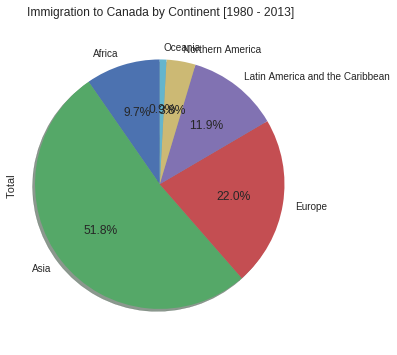

In [119]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%', # autopct create %,the label will be placed inside the wedge
                           startangle=90,     # rotates the start of the pie chart by angle degrees counterclockwise from the x-axis
                           shadow=True        # add shadow
                           )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')                             # sets the pie chart to look like a circle 

plt.show()

The above visual is not very clear, so we make a few modifications :

* Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend()

* Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter

* Explode the pie chart to emphasize the lowest three continents by pasing in explode parameter

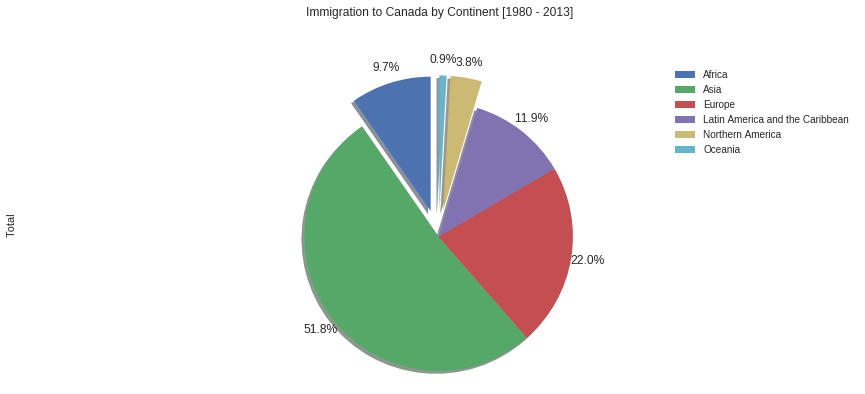

In [120]:
explode_list = [0.2, 0, 0, 0, 0.2, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,          # turn off labels 
                           pctdistance=1.12,     # Push out the percentages to sit just outside the pie chart  
                           explode=explode_list  # explode lowest 3 continents
                           )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')                                # sets the pie chart to look like a circle

# add legend
plt.legend(labels=df_continents.index,loc='upper right')

plt.show()

##3.Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

<img src="https://ibm.box.com/shared/static/9nkxsfihu8mgt1go2kfasf61sywlu123.png" width=440, align="center">

Let's plot the box plot for the China immigrants between 1980 - 2013.

###Step 1: Get the data

In [121]:
df_china=df.loc[['China'],years].transpose()
df_china.head()

Country,China
1980,5123
1981,6682
1982,3308
1983,1863
1984,1527


###Step 2: Plot the data

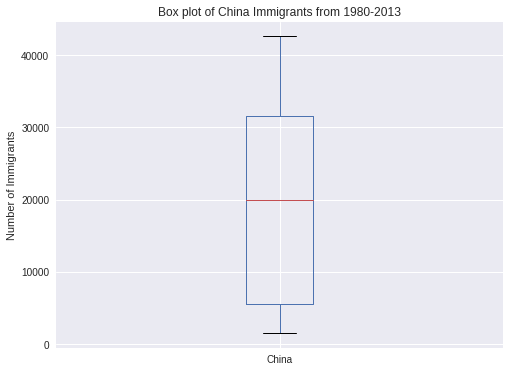

In [122]:
df_china.plot(kind='box',figsize=(8,6))

plt.title('Box plot of China Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [123]:
# view the actual numbers
df_china.describe()

Country,China
count,34.000000
mean,19410.647059
std,13568.230790
min,1527.000000
25%,5512.750000
50%,19945.000000
75%,31568.500000
max,42584.000000


###Question1: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [124]:
# get the dataset for china and india
df_CI=df.loc[['China','India'],years].transpose()
# view the percentages associated with both countries
print(df_CI.describe())
# view the first 5 rows in our dataframe
df_CI.head()

Country         China         India
count       34.000000     34.000000
mean     19410.647059  20350.117647
std      13568.230790  10007.342579
min       1527.000000   4211.000000
25%       5512.750000  10637.750000
50%      19945.000000  20235.000000
75%      31568.500000  28699.500000
max      42584.000000  36210.000000


Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


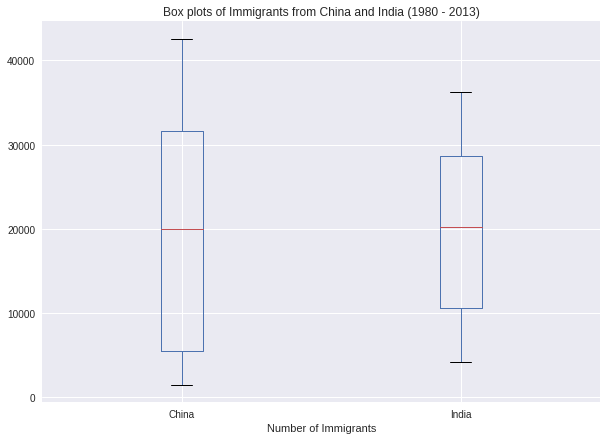

In [125]:
# plot data
df_CI.plot(kind='box',figsize=(10,7))

# label the title and x axis
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

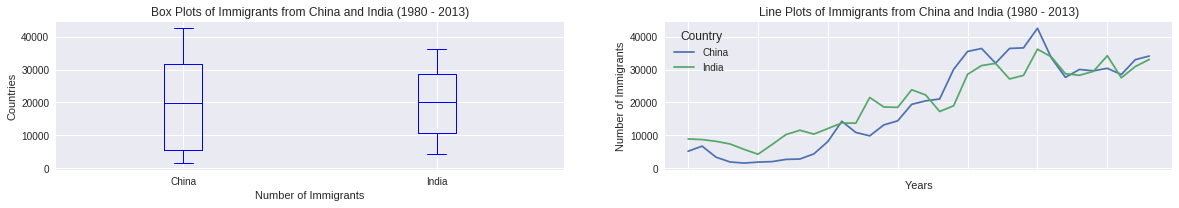

In [126]:
# plot multiple plots within the same figure


fig = plt.figure() # create figure

ax0=fig.add_subplot(2,2,1)# add subplot 1 (2 row, 2 columns, 1st plot)
ax1 = fig.add_subplot(2, 2, 2)# add subplot 2 (2 row, 2 columns, 2nd plot)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

###Question2: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [127]:
# step1: get the dataset
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [137]:
# Step 2: Create a new dataframe which contains the aggregate for each decade

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df to create a series for each decade
# sum across all years for each country
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

print(new_df.describe())
new_df.head()

               1980s          1990s          2000s
count      15.000000      15.000000      15.000000
mean    44418.333333   85594.666667   97471.533333
std     44190.676455   68237.560246  100583.204205
min      7613.000000   30028.000000   13629.000000
25%     16698.000000   39259.000000   36101.500000
50%     30638.000000   56915.000000   65794.000000
75%     59183.000000  104451.500000  105505.500000
max    179171.000000  261966.000000  340385.000000


,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


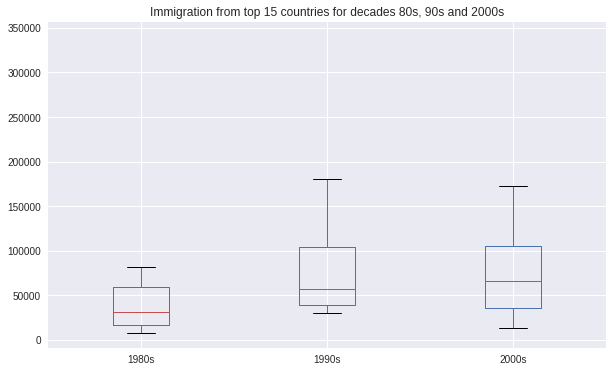

In [129]:
# Step 3: Plot the box plots

new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

##4.Scatter Plots

let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [138]:
# Step 1: Get the dataset

# use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index 
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the first 5 rows
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


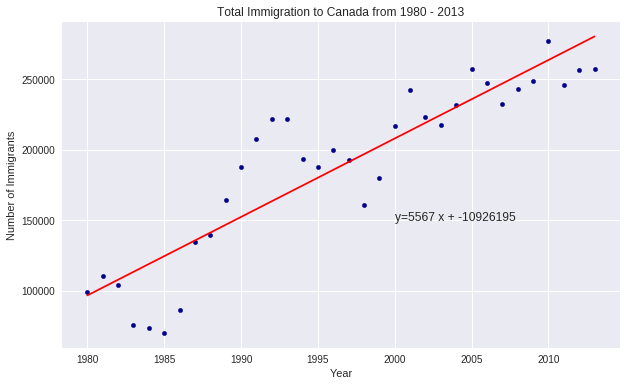

'No. Immigrants = 5567 * Year + -10926195'

In [131]:
# Step 2: Plot the data

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1) # Degree of fitting polynomial. 1 = linear, 2 = quadratic
# Plot the regression line
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

##5.Buble Plots

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil.

###Step 1: Get the data for Brazil and Argentina

In [139]:
# transposed dataframe
df_t=df[years].transpose()
# cast the Years (the index) to type int
df_t.index=map(int,df_t.index)
# label the index
df_t.index.name='Year'
# reset index to bring the year in as a column
df_t.reset_index(inplace=True)
#view the changes
df_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [0]:
# Step 2: Create the normalized weights

# normalize Brazil data
norm_brazil=(df_t['Brazil']-df_t['Brazil'].min())/(df_t['Brazil'].max()-df_t['Brazil'].min())
#normalize Argentina data
norm_argentina =(df_t['Argentina']-df_t['Argentina'].min())/(df_t['Argentina'].max()-df_t['Argentina'].min())


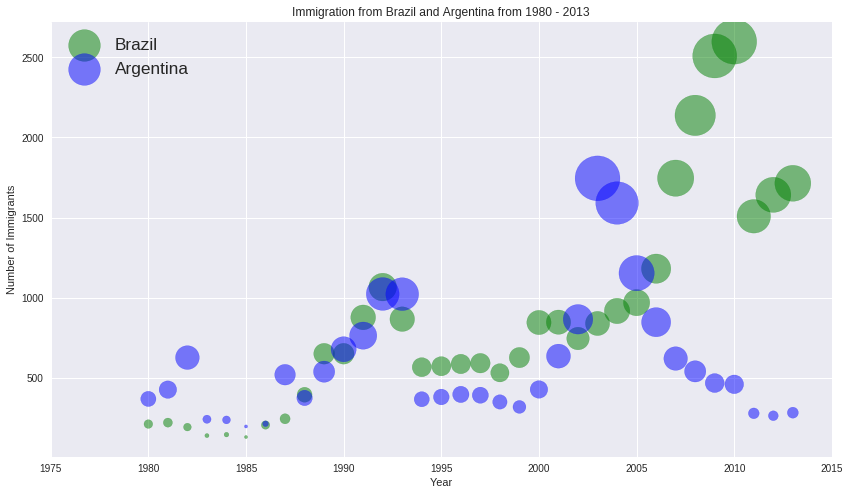

In [134]:
# Step 3: Plot the data

# Brazil
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

###Question: Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

In [0]:
# Step 1: Normalize the data pertaining to China and Indi

# normalize China data
norm_china = (df_t['China'] - df_t['China'].min()) / (df_t['China'].max() - df_t['China'].min())
# normalize India data
norm_india = (df_t['India'] - df_t['India'].min()) / (df_t['India'].max() - df_t['India'].min())



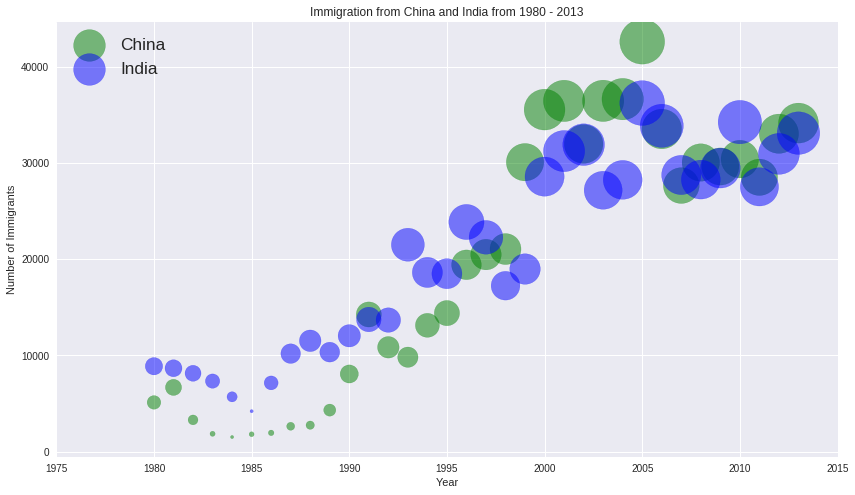

In [136]:
# Step 2: Generate the bubble plots

# China
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
# India
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


##Thank you for completing this notebook!

This notebook was created by [Cooper Finn](https://github.com/CooperFinn) with contributions from [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan), [Ehsan M.Kermani](https://www.linkedin.com/in/ehsanmkermani), [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic), [Alex Aklson](https://www.linkedin.com/in/aklson) .This notebook is part of a course on Coursera called Data Visualization with Python,which  is part of the IBM Data Science Professional Certificate Specialization.